In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats.mstats import winsorize

%matplotlib inline

In [9]:
df = pd.read_csv("C:/Users/tanay/OneDrive/Desktop/Summer Semester/Python/WHO Life Expectancy/Finalised_Data.csv")
df.count()

Country                            2790
Year                               2790
Status                             2790
Life expectancy                    2783
Adult Mortality                    2790
infant deaths                      2790
Alcohol                            2790
percentage expenditure             2790
Hepatitis B                        2790
Measles                            2790
 BMI                               2790
under-five deaths                  2790
Polio                              2790
Total expenditure                  2790
Diphtheria                         2790
 HIV/AIDS                          2790
 thinness  1-19 years              2790
 thinness 5-9 years                2790
Income composition of resources    2790
Schooling                          2790
Population                         2790
GDP                                2790
dtype: int64

In [10]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population,GDP
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.000000,...,58.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,34413603,1.990711e+10
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,64.5,1698.333333,...,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,33370794,2.048487e+10
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,2242.666667,...,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,32269589,2.056105e+10
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.000000,...,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,31161376,2.000162e+10
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.000000,...,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,30117413,1.780428e+10


In [11]:
# df1=df

In [ ]:
# df['GDP per capita'] = df['GDP']/df['Population']

In [ ]:
# df.head()

In [12]:
df.Status[df.Status =='Developing'] = 0
df.Status[df.Status =='Developed'] = 1

C:\Users\tanay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\tanay\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [13]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population,GDP
count,2790.000000,2783.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2790.000000,2.790000e+03,2.790000e+03
mean,2007.514337,69.678692,186.933320,30.874194,4.662632,775.639843,86.272895,2363.619355,38.672466,42.750538,87.307706,6.260300,87.201254,1.576201,4.820367,4.853821,0.635735,12.312017,3.773772e+07,3.209533e+11
std,4.605674,9.351714,116.533817,120.881196,3.999828,2032.951041,13.009292,11499.083312,20.027523,164.444341,14.323955,2.401596,14.877698,4.443668,4.473728,4.565899,0.207141,3.094900,1.380846e+08,1.288760e+12
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,8.000000,0.000000,1.000000,0.000000,9.000000,0.650000,9.000000,0.100000,0.100000,0.100000,0.000000,0.000000,1.082100e+04,3.750751e+07
25%,2004.000000,63.900000,98.270833,0.000000,1.100000,8.601906,79.647333,0.000000,19.300000,0.000000,82.000000,4.622500,82.000000,0.100000,1.600000,1.500000,0.506250,10.400000,2.181688e+06,5.316436e+09
50%,2008.000000,72.500000,161.000000,3.000000,3.580000,76.056492,89.000000,17.000000,43.900000,3.000000,94.000000,5.910000,94.000000,0.100000,3.300000,3.300000,0.683000,12.500000,7.989543e+06,2.139850e+10
75%,2012.000000,76.000000,238.000000,21.000000,7.727500,472.215945,96.000000,341.750000,56.400000,26.000000,97.000000,7.760000,97.000000,0.600000,7.100000,7.200000,0.786000,14.500000,2.605396e+07,1.480000e+11
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,43.500000,27.700000,28.600000,0.948000,20.700000,1.371220e+09,1.820000e+13


In [ ]:
# df.head()

In [ ]:
# df.dropna(axis=0,how='any',inplace=True)

In [14]:
df = df.fillna(method = 'ffill')
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Population                         0
GDP                                0
dtype: int64

In [15]:
df.count()

Country                            2790
Year                               2790
Status                             2790
Life expectancy                    2790
Adult Mortality                    2790
infant deaths                      2790
Alcohol                            2790
percentage expenditure             2790
Hepatitis B                        2790
Measles                            2790
 BMI                               2790
under-five deaths                  2790
Polio                              2790
Total expenditure                  2790
Diphtheria                         2790
 HIV/AIDS                          2790
 thinness  1-19 years              2790
 thinness 5-9 years                2790
Income composition of resources    2790
Schooling                          2790
Population                         2790
GDP                                2790
dtype: int64

In [4]:
# Regression using SciKit Learn

In [21]:
# Subsetting for X
X = df[['Status','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']]
# X.head()

In [22]:
# Subsetting for Y
Y=df['Life expectancy '].values
# Y.head()

In [23]:
# Test-Train split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

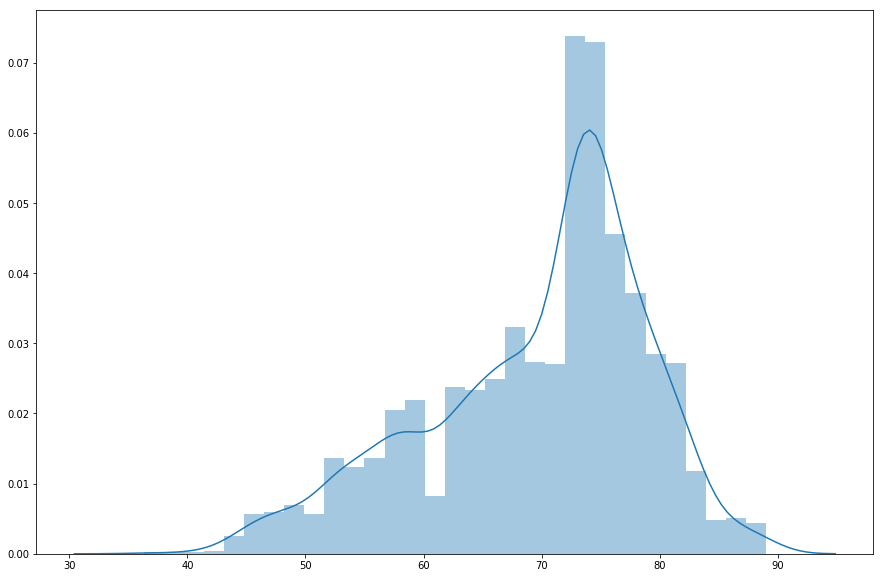

In [24]:
#Plot for average y value range
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(Y)

In [25]:
#Building the regression model
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
#Calculating predicted value of y from the model
y_pred = regressor.predict(x_test)

In [27]:
#Checking predicted vs actual value
df1=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

,Actual,Predicted
0,74.2,72.471593
1,74.4,72.974176
2,65.0,66.690247
3,62.9,63.224619
4,54.1,54.338057


In [28]:
#Calculating r-square and adjusted r2 values
r2 = regressor.score(X,Y)
print('r_sq = ', r2)
n =len(x_train)
p =X.shape[1]

r2_adj =1- (1-r2)*(n-1)/(n-(p+1))
print('Adjusted r-square = ',r2_adj)


r_sq =  0.9035180695916075
Adjusted r-square =  0.902733309199673


In [29]:
#2nd method for calculating r-squared value and RMSE
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)
print ('test_set_r2 = ',test_set_r2,'test_set_rmse= ',test_set_rmse) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


test_set_r2 =  0.8976575756522226 test_set_rmse=  3.0600735003769635
Mean Absolute Error: 2.0680177240331283
Mean Squared Error: 9.364049827709321
Root Mean Squared Error: 3.0600735003769635


In [30]:
#Calculating intercept and coefficients for regression variables
intercept, coefficients = regressor.intercept_, regressor.coef_
print('intercept:', intercept)
print('coefficients:', coefficients, sep='\n')


intercept: 62.69409130392498
coefficients:
[ 4.11841592e-01 -4.62842940e-02  2.12748588e-02  5.92178527e-02
  1.66020307e-04 -5.15707417e-02 -1.00835165e-05 -1.67238469e-02
  3.18171654e-03  7.71005552e-02  1.02352336e-01 -5.57122988e-02
 -1.46036576e-13  1.71376221e-09 -1.05318426e-02 -5.96642323e-02
  4.55146252e+00  6.12745600e-01]


In [31]:
#Regression using statsmodel (Adding constant and performing regression using OLS method)
import statsmodels.api as sm
x_sm = df[['Status','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ','under-five deaths ','Polio','Total expenditure','Diphtheria ',' HIV/AIDS',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling','GDP','Population']]
y_sm= df['Life expectancy '].values
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm).fit()
predictions = model.predict(x_sm)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1447.
Date:                Sun, 28 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:35:44   Log-Likelihood:                -6930.6
No. Observations:                2790   AIC:                         1.390e+04
Df Residuals:                    2771   BIC:                         1.401e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

C:\Users\tanay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [32]:
#Dropping columns : Polio, Total Expenditure, Thinness 1-5 years and thinness5-19 years
import statsmodels.api as sm
x_sm1 = df[['Status','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ','under-five deaths ','Diphtheria ',' HIV/AIDS','Income composition of resources','Schooling','GDP','Population']]
y_sm1= df['Life expectancy '].values
x_sm1 = sm.add_constant(x_sm1)
model1 = sm.OLS(y_sm1, x_sm1).fit()
predictions1 = model1.predict(x_sm1)
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1846.
Date:                Sun, 28 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:35:46   Log-Likelihood:                -6941.6
No. Observations:                2790   AIC:                         1.391e+04
Df Residuals:                    2775   BIC:                         1.400e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [33]:
#Dropping columns : GDP, infant deaths
import statsmodels.api as sm
x_sm2 = df[['Status','Adult Mortality','Alcohol','percentage expenditure','Hepatitis B','Measles ','under-five deaths ','Diphtheria ',' HIV/AIDS','Income composition of resources','Schooling','Population']]
y_sm2= df['Life expectancy '].values
x_sm2 = sm.add_constant(x_sm2)
model2 = sm.OLS(y_sm2, x_sm2).fit()
predictions2 = model2.predict(x_sm2)
print(model2.summary())
# print(predictions2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     2149.
Date:                Sun, 28 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:35:47   Log-Likelihood:                -6945.3
No. Observations:                2790   AIC:                         1.392e+04
Df Residuals:                    2777   BIC:                         1.399e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
pd.Series([variance_inflation_factor(x_sm2.values, i) 
               for i in range(x_sm2.shape[1])], 
              index=x_sm2.columns)


const                              112.422155
Status                               1.992142
Adult Mortality                      3.795324
Alcohol                              1.941189
percentage expenditure               1.356317
Hepatitis B                          1.735954
Measles                              1.685264
under-five deaths                    2.323519
Diphtheria                           2.544892
 HIV/AIDS                            2.321227
Income composition of resources      2.541191
Schooling                            3.697901
Population                           2.457363
dtype: float64

In [48]:
import statsmodels
rmse = statsmodels.tools.eval_measures.rmse([y_sm2],[predictions2],axis = 1)
print(rmse)

[2.91655197]


Text(0, 0.5, 'Predictions')

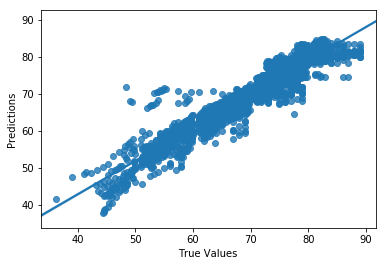

In [37]:
sns.regplot(x=y_sm2,y=predictions2,data=df)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [38]:
import statsmodels.api as sm
x_sm3 = df[['Status','Adult Mortality','Alcohol','percentage expenditure','Hepatitis B','Polio','Measles ','under-five deaths ',' HIV/AIDS','Income composition of resources','Schooling','Population']]
y_sm3= df['Life expectancy '].values
x_sm3 = sm.add_constant(x_sm3)
model3 = sm.OLS(y_sm2, x_sm3).fit()
predictions3 = model3.predict(x_sm3)
print(model3.summary())
# print(predictions2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     2114.
Date:                Sun, 28 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:35:55   Log-Likelihood:                -6966.0
No. Observations:                2790   AIC:                         1.396e+04
Df Residuals:                    2777   BIC:                         1.404e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
pd.Series([variance_inflation_factor(x_sm.values, i) 
               for i in range(x_sm.shape[1])], 
              index=x_sm.columns)


C:\Users\tanay\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning:

divide by zero encountered in double_scalars



const                                0.000000
Status                               2.092833
Adult Mortality                      3.869256
infant deaths                      300.882724
Alcohol                              2.097973
percentage expenditure               1.363552
Hepatitis B                          1.862026
Measles                              1.871911
under-five deaths                  277.525498
Polio                               18.383354
Total expenditure                    1.410749
Diphtheria                          18.056527
 HIV/AIDS                            2.344058
 thinness  1-19 years                8.693215
 thinness 5-9 years                  8.706779
Income composition of resources      2.581960
Schooling                            3.787118
GDP                                  1.772694
Population                           5.320391
dtype: float64

In [47]:
df.loc[:,"Life expectancy "].mean()

69.6627956989248

In [42]:
predictions2.mean()

69.66279570646044